<a href="https://colab.research.google.com/github/Abhishek1236/deep-learning-model/blob/master/som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#importing the dataset
dataset = pd.read_csv('/content/Credit_Card_Applications.csv')

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [0]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [0]:
#feature scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
x = sc.fit_transform(x)

In [0]:
from minisom import MiniSom

In [0]:
#Training the Som
som = MiniSom(x = 10,y = 10,input_len =15,sigma = 1.0,learning_rate = 0.5)

In [0]:
#initializing the weights
som.random_weights_init(x)
som.train_random(x,num_iteration=100)

In [0]:
#visualizing the reault
from pylab import bone, pcolor,colorbar,plot,show

In [28]:
x.shape

()

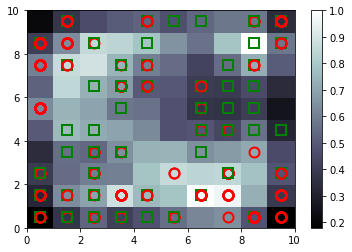

In [50]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i, x in enumerate(x):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show() 

In [0]:
#finding the frauds 
mapping = som.win_map(x)

In [51]:
frauds = np.concatenate((mapping[(6,1)] ,mapping[(7,1)]),axis = 0)
frauds

array([[6.17573450e-01, 0.00000000e+00, 3.22105263e-01, 1.33928571e-01,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 8.95522388e-02, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 2.00000000e-03],
       [7.82624365e-01, 0.00000000e+00, 4.13533835e-02, 4.46428571e-02,
        5.00000000e-01, 7.69230769e-01, 3.75000000e-01, 8.77192982e-03,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
        5.00000000e-01, 5.40000000e-02, 9.80000000e-04],
       [5.84745865e-01, 0.00000000e+00, 1.39097744e-01, 6.55357143e-02,
        5.00000000e-01, 3.07692308e-01, 2.50000000e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
        5.00000000e-01, 1.00000000e-01, 5.30000000e-04],
       [7.84926861e-01, 0.00000000e+00, 3.50375940e-02, 1.19642857e-02,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+0

In [52]:
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5719940e+07, 0.0000000e+00, 3.5170000e+01, 3.7500000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 2.0100000e+02],
       [1.5761158e+07, 0.0000000e+00, 1.6500000e+01, 1.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 9.9000000e+01],
       [1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 5.4000000e+01],
       [1.5761733e+07, 0.0000000e+00, 1.6080000e+01, 3.3500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,